# 1. Datos: Precipitaciones, Indicadores Económicos del Banco Central

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco_central = pd.read_csv("banco_central.csv")


# 2. Análisis de Datos. Creación de variables

## Precipitaciones

In [4]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [5]:
precipitaciones.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [6]:
precipitaciones.isna().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

In [7]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


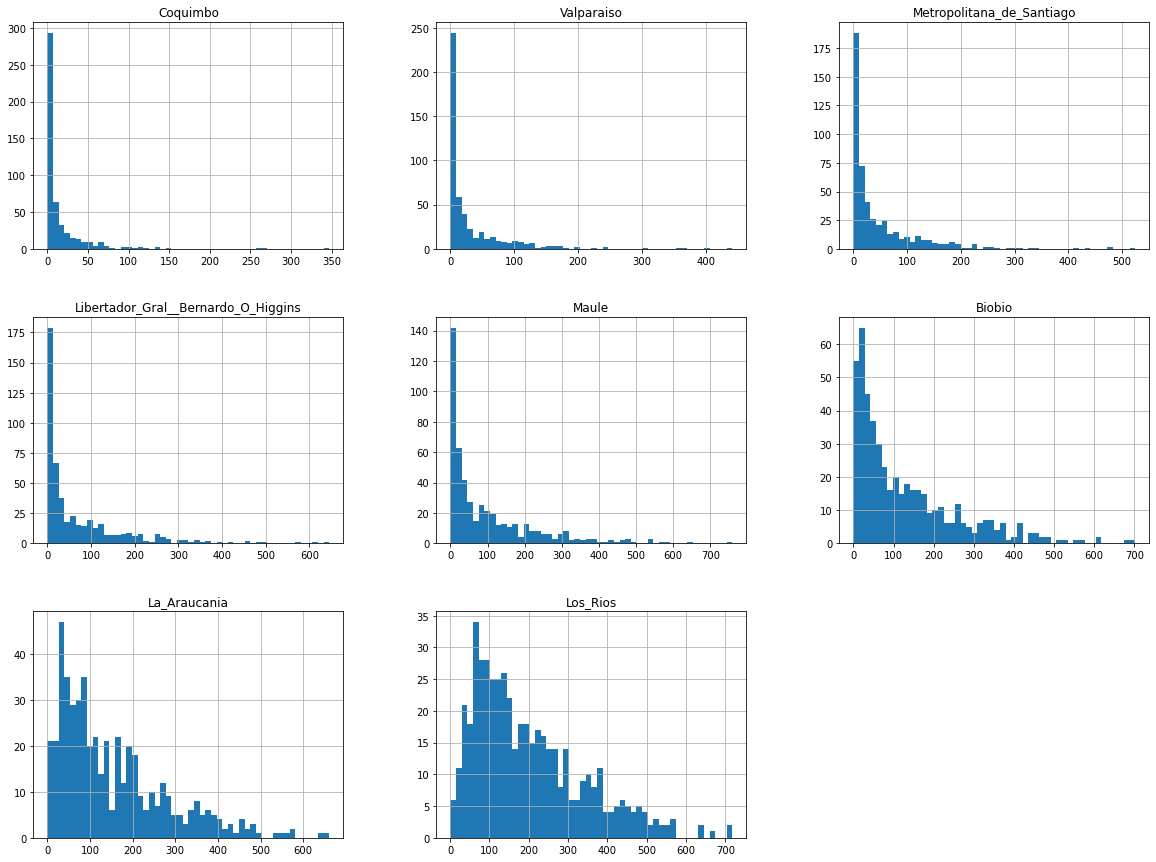

In [8]:
# histogramas

precipitaciones.hist(bins=50, figsize=(20,15))
plt.show()


In [9]:
# correlations

corr_matrix = precipitaciones.corr()

# estudiemos, por ejemplo, la correlación de las precipitaciones con Santiago

corr_matrix['Metropolitana_de_Santiago'].sort_values(ascending=False)

Metropolitana_de_Santiago              1.000000
Libertador_Gral__Bernardo_O_Higgins    0.976389
Valparaiso                             0.967567
Maule                                  0.904947
Coquimbo                               0.813478
Biobio                                 0.804073
La_Araucania                           0.729807
Los_Rios                               0.677950
Name: Metropolitana_de_Santiago, dtype: float64

1. Es decir, las regiones mas cercanas están altamente correlacionadas con Santiago

In [10]:
precipitaciones.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

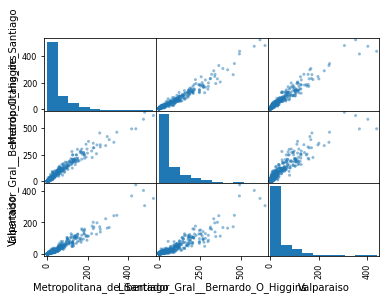

In [11]:
from pandas.plotting import scatter_matrix

zonas_centro = ["Metropolitana_de_Santiago", "Libertador_Gral__Bernardo_O_Higgins", "Valparaiso"]
scatter_matrix(precipitaciones[zonas_centro])
plt.show()

### Banco Central

In [12]:
banco_central.shape

(614, 85)

In [13]:
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [14]:
banco_central.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [15]:
banco_central.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [16]:
banco_central.isna().sum()

Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64

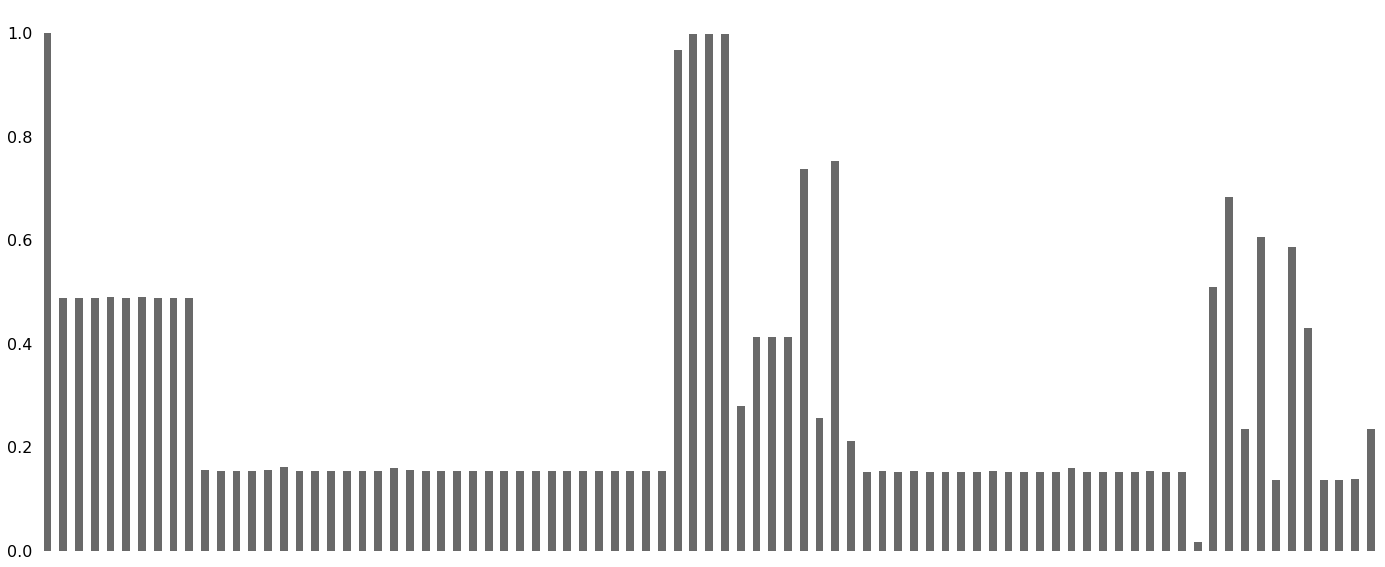

In [17]:
import missingno as msno

msno.bar(banco_central)

# 3. Visualización

In [66]:
def plot_precipitations(region_name, initial_date, final_date, df):
    """
    initial_date: str
                date with the format 'YYYY-MM-DD'
    initial_date: str
                date with the format 'YYYY-MM-DD'
    region_name: str
           name of the region
    df: pandas.DataFrame
        dataframe with 'date' among its columns
    """
    precipitaciones = df.copy()

    # parse strings and conversions to datetime type
    initial_date, final_date = pd.to_datetime(initial_date), pd.to_datetime(final_date)
    if initial_date> final_date:
        initial_date, final_date = final_date, initial_date  # swap dates in case of error
    precipitaciones['date'] = pd.to_datetime(precipitaciones['date'])

    # sort values and set date as index
    precipitaciones.sort_values(['date'], inplace=True)
    precipitaciones = precipitaciones.set_index('date')

    # conditions to filter the data
    condition_region = (region_name in list(precipitaciones.columns))
    condition_dates = (precipitaciones.index>= initial_date) & (precipitaciones.index<= final_date)


    if condition_region:
        df_filtered_by_date = precipitaciones.loc[condition_dates]

        if len(df_filtered_by_date)==0:
            return f"no data in between {initial_date} and {final_date}"
        
        plt.style.use('fivethirtyeight')
        ax = df_filtered_by_date[region_name].plot()
        ax.set_xlabel("Date")
        ax.set_ylabel("precipitacion level (mm)")
        ax.set_title(f"precipitations in {region_name} in between {initial_date} and {final_date}", fontsize=10)
        plt.show()
        # plt.scatter(x="date", y=region_name, data=df_filtered_by_date)
    else:
        return f"region {region_name} not found. try a region in {df.drop(['date'], axis=1).columns}"

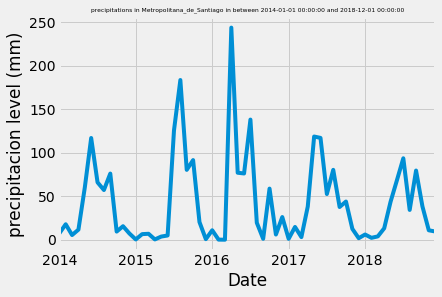

In [65]:
# test function

initial_date = "2014-01-01"
final_date = "2018-12-01"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

# 3.1

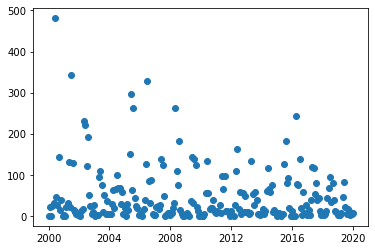

In [46]:
# Región Metropolitana entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

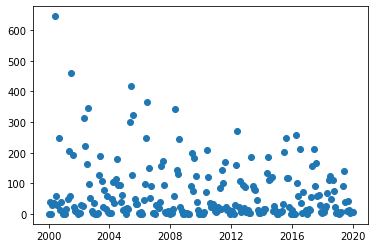

In [48]:
# L entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Libertador_Gral__Bernardo_O_Higgins"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

In [ ]:
# se observan comportamientos parecidos en cuanto a precipitaciones, con la diferencia de que en Libertador Bernardo O'Higgins hay un mayor volumen en mm